In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.plotly as py
from sys import getsizeof

In [2]:
meta_test = pd.read_csv('./VSB_unpacked/metadata_test.csv')
meta_train = pd.read_csv('./VSB_unpacked/metadata_train.csv')
df_train = pd.read_parquet('VSB_unpacked/train.parquet')

In [32]:
%time wow = np.fft.fft(df_train.iloc[:,:500])

CPU times: user 9.13 s, sys: 17.3 s, total: 26.4 s
Wall time: 16.5 s


In [29]:
wow.shape

(800000, 10)

In [22]:
type(df_train['0'])

pandas.core.series.Series

In [20]:
wow.shape

(800000, 50)

/Users/juliansweet/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning:

object of type <class 'float'> cannot be safely interpreted as an integer.



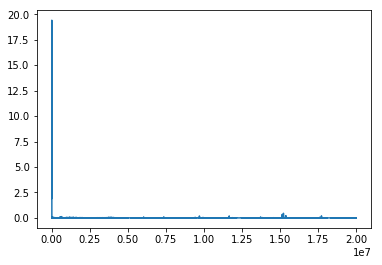

In [42]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

# Number of samplepoints
N = 800_000
# sample spacing
T = 25 * 10**-9
x = np.linspace(0.0, N*T, N)
y = df_train['0']
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.show()

ValueError: x and y must have same first dimension, but have shapes (40000000,) and (800000,)

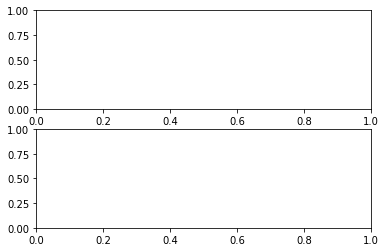

In [36]:
Fs = ((20 * 10**-3)/800_000)**-1;  # sampling rate, 40 MHz
Ts = 1.0/Fs; # sampling interval, 25ns
t = np.arange(0,1,Ts) # time vector

#ff = 5;   # frequency of the signal
y = df_train['0']

n = len(y) # length of the signal
k = np.arange(n)
T = n/Fs
frq = k/T # two sides frequency range
frq = frq[range(int(n/2))] # one side frequency range

Y = np.fft.fft(y)/n # fft computing and normalization
Y = Y[range(int(n/2))]

fig, ax = plt.subplots(2, 1)
ax[0].plot(t,y)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[1].plot(frq,abs(Y),'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')

In [40]:
len(t)

40000000

In [20]:
import matplotlib.pyplot as plt
import plotly.plotly as py
import numpy as np
# Learn about API authentication here: https://plot.ly/python/getting-started
# Find your api_key here: https://plot.ly/settings/api

Fs = 150.0;  # sampling rate
Ts = 1.0/Fs; # sampling interval
t = np.arange(0,1,Ts) # time vector

ff = 5;   # frequency of the signal
y = np.sin(2*np.pi*ff*t)

n = len(y) # length of the signal
k = np.arange(n)
T = n/Fs
frq = k/T # two sides frequency range
frq = frq[range(n/2)] # one side frequency range

Y = np.fft.fft(y)/n # fft computing and normalization
Y = Y[range(n/2)]

fig, ax = plt.subplots(2, 1)
ax[0].plot(t,y)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[1].plot(frq,abs(Y),'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')

plot_url = py.plot_mpl(fig, filename='mpl-basic-fft')

TypeError: 'float' object cannot be interpreted as an integer